## Aprendizagem de máquina

### Objetivos

  - Avaliar os conceitos de aprendizado de maquina aprendidos no curso


# Desafio

Você foi contratado por uma empresa inovadora do ramo imobiliario como `QuintoAndar, Loft, Terraz, grupo Zap (ZAP, Viva Real, DataZAP, FipeZAP, SuaHouse, Geoimóvel, Sub100 e Conecta Imobi) ou Imobi Conference`. O seu desafio está no apio à tomada de decisão baseada em dados (empresa data driven). 

Nesse sentido, use a base de dados **aptos.csv** para realizar a descoberta do conhecimento e responder a pergunta: 

**`Quanto vale um apartamento de 72m2 com 2 quartos, 2 vagas, reformado no Centro?`**


### Orientações

Siga as instruções, completando e construindo os algoritmos necessários.

Nas celulas` Seu Código aqui...` significa que é necessário realizar a implementação de algum código. Utilize quantos blocos(células) julgar necessário para criar o código.

Nas celulas `Responda` significa que é nessário uma resposta clara e objetiva (pode ser por texto, código, gráfico, imagem...) para a pergunta.

## Rubrica para avaliação
    
Os critérios de avaliação do projeto segue conforme a rubrica.

- R1: Exploração de Dados (Até 2 pontos)
- R2: Análise Descritiva de Dados (Até 2 pontos)
- R3: Desenvolvimento do Modelo (Até 2 pontos)
- R4: Treinamento e Teste do Modelo (Até 2 pontos)
- R5: Conclusões Finais (Até 2 pontos)

**Nota_final = R1 + R2 + R3 + R4 + R5**

# 1. Exploração de Dados

Carregue o dataset e faça uma inspeção nas 15 primeiras linhas para identificação básica dos atributos.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

In [ ]:
# Lê e carrega o arquivo para a memória
dados = pd.read_csv('aptos.csv')

In [ ]:
dados = dados.dropna()

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 0 to 113
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   metros     112 non-null    int64  
 1   valor      112 non-null    float64
 2   quartos    112 non-null    int64  
 3   vagas      112 non-null    int64  
 4   reformado  112 non-null    float64
 5   bairro     112 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 6.1+ KB


In [ ]:
dados.head(15)

,metros,valor,quartos,vagas,reformado,bairro
0,107,560.0,3,2,0.0,Vila Lusitania
1,107,555.0,3,2,1.0,Vila Lusitania
2,49,196.0,2,1,0.0,Ferrazopolis
3,104,515.0,3,2,1.0,Centro
4,92,560.0,3,2,1.0,Vila Lusitania
5,51,249.0,2,1,0.0,Taboao
6,140,635.0,4,3,1.0,Centro
7,50,210.0,2,1,1.0,Demarchi
8,93,450.0,3,2,0.0,Baeta Neves
9,107,425.0,3,2,1.0,Rudge Ramos


In [ ]:
def mapear_bairro(x): 
  if x == "Demarchi": return(0)
  elif x == "Assuncao": return(1)
  elif x == "Baeta Neves": return(2)
  elif x == "Centro": return(3)
  elif x == "Ferrazopolis": return(4)
  elif x == "Independencia": return(5)
  elif x == "Iraja": return(6)
  elif x == "Jordanopolis": return(7)
  elif x == "Nova Petropolis": return(8)
  elif x == "Pauliceia": return(9)
  elif x == "Piraporinha": return(10)
  elif x == "Planalto": return(11)
  elif x == "Rudge Ramos": return(12)
  elif x == "Santa Teresinha": return(13)
  elif x == "Taboao": return(14)
  elif x == "Vila Lusitania": return(15)
  elif x == "Jardim do Mar": return(16)
dados['map_bairro'] = dados['bairro'].apply(mapear_bairro)


In [ ]:
dados.groupby(['bairro']).mean()

,metros,valor,quartos,vagas,reformado,map_bairro
bairro,,,,,,
Assuncao,53.666667,259.000000,2.000000,1.000000,0.888889,1.0
Baeta Neves,97.705882,523.470588,2.941176,2.117647,0.294118,2.0
Centro,90.176471,464.823529,2.852941,1.911765,0.411765,3.0
Demarchi,55.200000,229.400000,2.000000,1.000000,0.800000,0.0
Ferrazopolis,47.750000,212.250000,2.000000,1.250000,0.000000,4.0
Independencia,66.666667,359.000000,2.333333,1.333333,0.000000,5.0
Iraja,79.666667,377.000000,2.333333,1.333333,0.666667,6.0
Jardim do Mar,150.000000,807.500000,3.000000,4.000000,1.000000,16.0
Jordanopolis,54.000000,245.000000,2.000000,1.000000,1.000000,7.0


### `Pergunta:` Apresente uma breve descrição do significado de cada atributo:

Exemplo:
- Idade: Idade em anos da pessoa
- Marca: fabricante de carros
- Combustivel: tipo de combustível (gasolina, disel...)
- Especie: Tipo de flor iris-setosa, virginica... (Variável Alvo)






**Resposta:**

-   Metros: Tamanho do apartamento em metros quadrados (m²).
-   Valor: O quanto custa o apartamento.
-   Quartos: Número de quartos que o apartamento possui.
-   Vagas: Provavelmente a quantidade de vagas na garagem para veículos.
-   Reformado: Número de vezes o apartamento passou por reforma.
-   Bairro: Bairro em que o apartamento fica localizado.



**Pergunta:** Cite 2 cenários que podem fazer sentido na leitura dos dados apresentados.

Exemplo: 
- Eu acho que o preço da gasolina sobe com o preço do petróleo. 
- Eu acho que na média homens são mais altos que mulheres na mesma faixa etaria.  

**Resposta:**

1.  Eu acho que quanto maior o metro quadrado do apartamento, o número de quartos e o número de vagas na garagem, mais caro é o valor do imóvel.
2.  Eu acho que os apartamentos localizados no bairro Vila Lusitania costumam ser os mais caros.

## 2. Análise descritiva de dados

Faça uma análise exploratória dos dados. Utilize-se de gráficos e tabelas auxiliares, faça correlações entre os atributos.... Com o objetivo validar as afirmações levantadas acima.

In [ ]:
#Cenário 1 - Eu acho que quanto maior o metro quadrado do apartamento, o número -
#de quartos e o número de vagas na garagem, mais caro é o valor do imóvel.

#Tabela para comprovação da afirmação(cenário 1) com alguns valores.

dados.iloc[[0, 1, 3, 4, 6, 8, 9, 10], [0, 1, 2, 3, 5]]



,metros,valor,quartos,vagas,bairro
0,107,560.0,3,2,Vila Lusitania
1,107,555.0,3,2,Vila Lusitania
3,104,515.0,3,2,Centro
4,92,560.0,3,2,Vila Lusitania
6,140,635.0,4,3,Centro
8,93,450.0,3,2,Baeta Neves
9,107,425.0,3,2,Rudge Ramos
10,100,422.0,3,2,Baeta Neves


In [ ]:
#Tabela para comparação com alguns valores mais baixos

dados.iloc[[2, 5, 7, 11, 12, 13, 14], [0, 1, 2, 3, 5]]

,metros,valor,quartos,vagas,bairro
2,49,196.0,2,1,Ferrazopolis
5,51,249.0,2,1,Taboao
7,50,210.0,2,1,Demarchi
11,64,250.0,2,1,Pauliceia
12,65,350.0,2,2,Centro
13,71,303.0,3,1,Centro
14,64,294.0,3,1,Planalto


In [ ]:
#Cenário 2 - Eu acho que os apartamentos localizados no bairro Vila Lusitania costumam ser os mais caros.

dados.iloc[[0, 1, 4, 3, 6, 12, 13], [0, 1, 5]]

,metros,valor,bairro
0,107,560.0,Vila Lusitania
1,107,555.0,Vila Lusitania
4,92,560.0,Vila Lusitania
3,104,515.0,Centro
6,140,635.0,Centro
12,65,350.0,Centro
13,71,303.0,Centro


<Axes: xlabel='valor', ylabel='bairro'>

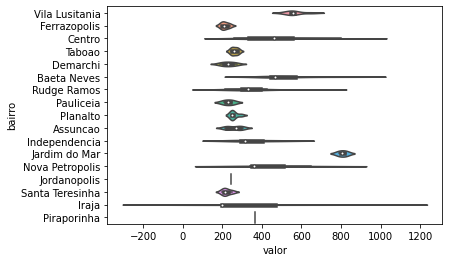

In [ ]:
sns.violinplot(x='valor', y='bairro', data=dados)

#dados = pd.DataFrame({'bairro': ['Vila Lusitania', 'Vila Lusitania', 'Ferrazopolis', 'Centro', 'Vila Lusitania', 'Taboao', 'Centro', 'Demarchi', 'Baeta Neves', 
                              #'Rudge Ramos', 'Baeta Neves', 'Pauliceia', 'Centro', 'Centro', 'Planalto'],
                      #'valor': [560.0, 555.0, 196.0, 515.0, 560.0, 249.0, 635.0, 210.0, 450.0, 425.0, 422.0, 250.0, 350.0, 303.0, 294.0]})
#sns.violinplot(x='valor', y='bairro', data=dados)


### __(BONUS: 1 ponto extra.)__ Análise de Outliers
*Esse é um ponto extra, faça se quiser...

Realize a análise e o tratamento de **outliers**, como referência para estudo:

* [link1](https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/)
* [link2](https://towardsdatascience.com/4-machine-learning-techniques-for-outlier-detection-in-python-21e9cfacb81d)
* [link3](https://minerandodados.com.br/tratando-outliers-python/)

**Pergunta:** Foram localizados outliers? Qual o método de análise adotado? Se existe, como os dados foram tratados (foram removidos ou mantidos)? 

## 3. Desenvolvimento do Modelo

**Pergunta:** O conjunto de dados indica a aplicação de qual modelo de 
aprendizagem de maquina para determinação do valor de um imóvel? Por que? 


---


-> Minha resposta: Aprendizado supervisionado, pois já são apresentado dados rotulados para que haja uma resposta no final e a máquina possa medir sua precisão.

**Resposta:**

    [ ] Aprendizado por reforço
    [X] Aprendizado supervisionado
    [ ] Aprendizado não supervisionado

**Pergunta:** Qual a técnica sugerida para este projeto?

---
-> Minha resposta: Acredito que seja pela técnica de regressão, pois preciso de resultados numéricos.


**Resposta:**

    [X] Regressão
    [ ] Classificação
    [ ] Clusterização

**Pergunta:** Escolha 2 modelos de algoritmos para testar a performance de cada um deles.

**Resposta:**

1. algoritimo: Linear Regression
2. algoritimo: Random Forest

__(BONUS: 1 ponto extra.)__ **Pergunta:** Explique como cada algoritmo funciona.


**Resposta:**

1. algoritimo: **Linear Regression** --> A regressão linear apresenta a característica de prever um valor desconhecido usando como base outros valores/dados já conhecidos.
2. algoritimo: **Random Forest** --> O algoritmo Random Forest realiza predições, ou seja, ele cria de forma aleatória diversas árvores de decisão, e no final, combina todos os resultados obtidos de cada uma delas como objetivo de chegar no resutlado final.

## 4. Treinamento e teste do modelo

Crie um subset dos dados apenas com os atributos que serão utilizados para o treinameno e teste do modelo. Divida o subset em conjunto de treinamento e teste.

In [ ]:
from sklearn.model_selection import train_test_split

x = dados.drop(columns=['valor', 'bairro'])
y = dados['valor']                

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

Faça o treinamento e teste dos 2 algoritmos escolhidos. Utilize uma métrica (ex. R2-score, RMSE e MAE...) para avaliar a performance dos modelos.

### Algoritmo 1

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr = LinearRegression()

In [ ]:
lr.fit(x_train,y_train) 

y_lr_predicoes = lr.predict(x_test) 

In [ ]:
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(y_test, y_lr_predicoes))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(y_test, y_lr_predicoes))
print("R2-score: %.2f" % r2_score(y_lr_predicoes , y_test))

Erro Quadrático Médio (MSE): 6484.84
Erro Médio Absoluto (MAE): 62.58
R2-score: 0.55


### Algoritmo 2

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [ ]:
rfr.fit(x_train, y_train)

y_rfr_predicoes = rfr.predict(x_test)

In [ ]:
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(y_test, y_rfr_predicoes))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(y_test, y_rfr_predicoes))
print("R2-score: %.2f" % r2_score(y_rfr_predicoes , y_test) )

Erro Quadrático Médio (MSE): 5992.82
Erro Médio Absoluto (MAE): 52.89
R2-score: 0.67


Sumarize na tabela abaixo os resultados obtidos para os conjuntos de dados de treino e de teste

**Resposta:**

|    | algoritmo1 | algoritmo2 |
|:---:|:---:|:---:|
| treino | X | X |
| teste  | X | X |

In [ ]:
suma = {'algoritmo1': [sum(y_train),sum(y_lr_predicoes)], 'algoritmo2': [sum(y_train), sum(y_rfr_predicoes)]}

In [ ]:
dados_result = pd.DataFrame(suma)
dados_result

,algoritmo1,algoritmo2
0,35626.000000,35626.000
1,9445.718743,9575.326


**Pergunta:** Qual dos algoritmos obteve um resultado melhor? Justifique

**Resposta:** O Linear Regressiom, pois a sumarização dele apresentou um resultado maior que o do Random Forest.

## Modelo de produção: Teste com novos dados

Use seu modelo treinado para determinar: 

**`Quanto vale um apartamento de 72m2 com 2 quartos, 2 vagas, reformado no Centro?`**

In [ ]:
answer = {'metros': [72], 'quartos': [2], 'vagas': [2], 'reformado': [1], 'map_bairro': [17]}

dados = pd.DataFrame(answer)
dados


,metros,quartos,vagas,reformado,map_bairro
0,72,2,2,1,17


In [ ]:
y_lr_predicoes = lr.predict(dados)
print("Acho que vale: ", y_lr_predicoes, "reais.")

Acho que vale:  [371.40661419] reais.


## 6. Conclusões finais

Ufa!!... Chegamos ao final. Parabéns! De forma simplificada e completa, passamos por todas as etapas de um projeto de aprendizado de maquina. Outras etapas podem ser adicionadas no tratamento dos dados e desenvolvimento do modelo.


**Pergunta:**: O modelo desenvolvido obteve um resultado satisfatório? Justifique:

**Resposta**:

**Pergunta:**: O que faria diferente para melhorar resultado obtido? Justifique:

**Resposta**:




